In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.colors
import matplotlib.ticker as mtick
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error
from sklearn.metrics import confusion_matrix, plot_roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

import warnings
warnings.simplefilter('ignore')

# Loading dataset

In [2]:
# loading data
df = pd.read_csv('DATASET/diabetes_unbalanced.csv')

print('Shape of dataset is: {}'.format(df.shape))


Shape of dataset is: (253680, 22)


In [3]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

# Cleaning the dataset

## Missing Values

In [5]:
# checking if there missing values
df.isna().sum() 

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

- No missing values found

In [6]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


## Remove Duplicates

In [7]:
duplicates = df[df.duplicated()]
print("Duplicate Rows : ",len(duplicates))
duplicates.head()

Duplicate Rows :  24206


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,1.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,0.0,10.0,4.0,5.0
1563,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
2700,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
3160,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
3332,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0


In [8]:
#Drop duplicates
df.drop_duplicates(inplace=True)

# Grouping variables

In [9]:
# grouped variables
target = 'Diabetes_binary'
bool_vars = (df.nunique()[df.nunique() == 2]
                .index
                .drop(labels='Diabetes_binary'))
num_vars = [var for var in df.columns if var not in bool_vars and var != 'Diabetes_binary']

# EDA : Target / Balancing Dataset

1.0     35097
0.0    194377
Name: Diabetes_binary, dtype: int64
1.0    15.294543%
0.0    84.705457%
Name: Diabetes_binary, dtype: object



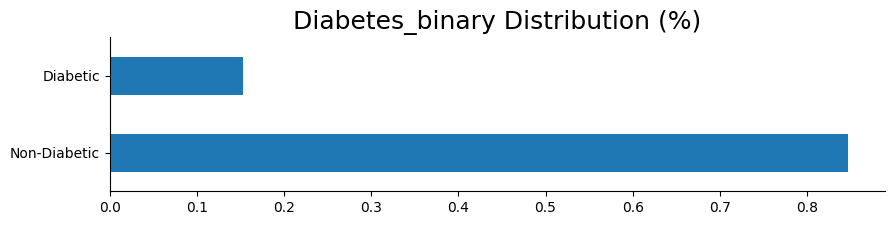

In [10]:
print(df['Diabetes_binary'].value_counts(ascending=True))
print(df['Diabetes_binary'].value_counts(1,ascending=True).apply(lambda x: format(x, '%')))
print()
df['Diabetes_binary'].value_counts(1).plot(kind='barh',figsize=(10, 2)).spines[['top', 'right']].set_visible(False);
plt.title('Diabetes_binary Distribution (%)', fontsize=18)
plt.yticks(ticks=[0,1], labels=['Non-Diabetic', 'Diabetic']);

- We have unbalanced dataset where Diabetic patients are one quartile to non diabetic patients.

In [13]:
#Remove anamolies/outilers from the data
from sklearn.ensemble import IsolationForest
model = IsolationForest()
model.fit(df)
#df['anomailes_scores']=model.decision_function(df)
df['anomaly']= model.predict(df)

In [14]:
df.drop(df[df['anomaly']==-1].index,inplace = True)

In [15]:
df.shape

(154448, 23)

In [31]:
df.drop(['anomaly'],axis=1,inplace=True)

# EDA : Category variables

In [32]:
colors = ['#be4d25','#2596be']
def analyse_cat(var):
    (df.groupby('Diabetes_binary')[var]
     .value_counts(1)
     .unstack()
     .iloc[:,::-1]
     .plot(kind='barh',stacked=True,figsize=(10, 2), color=colors, alpha=1)
     .spines[['top', 'right']].set_visible(False))
    plt.legend(['Yes', "No"],bbox_to_anchor=(1, 1, 0, 0),shadow=False, frameon=False)
    plt.yticks(ticks=[0,1], labels=['Non-Diabetic', 'Diabetic'])
    plt.tight_layout()
    plt.title(var, fontsize=18)
    plt.show()

In the graphs below, Its possible to quick check the *percentage* that represents each categorical variable for people **with** and **without diabetes**.

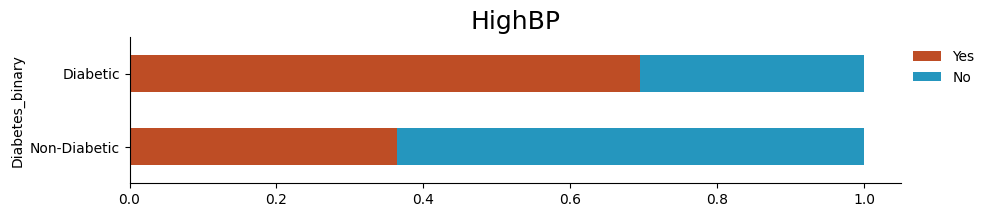

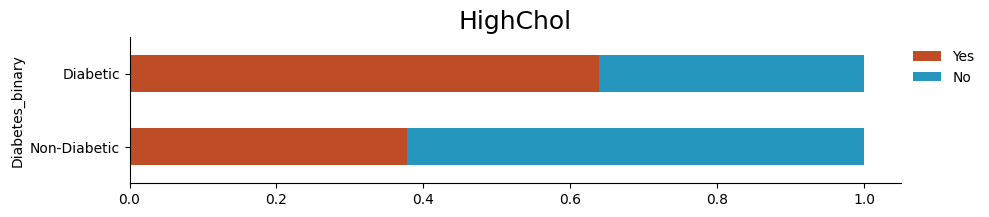

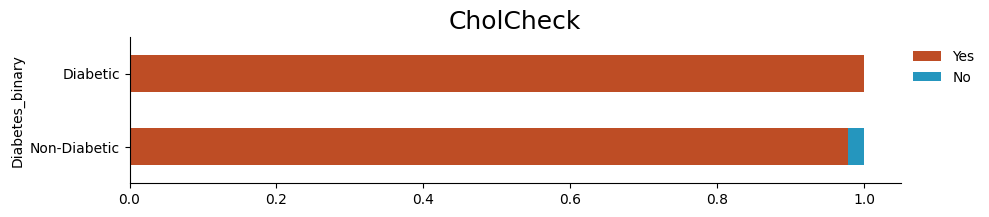

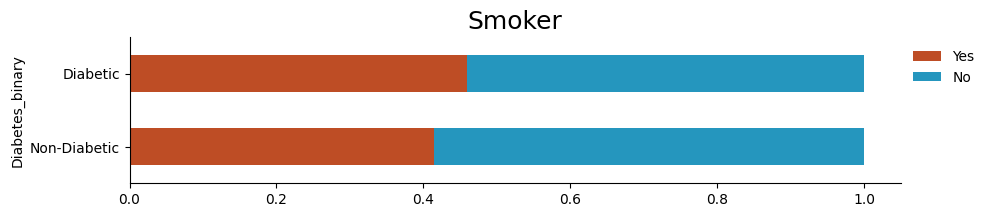

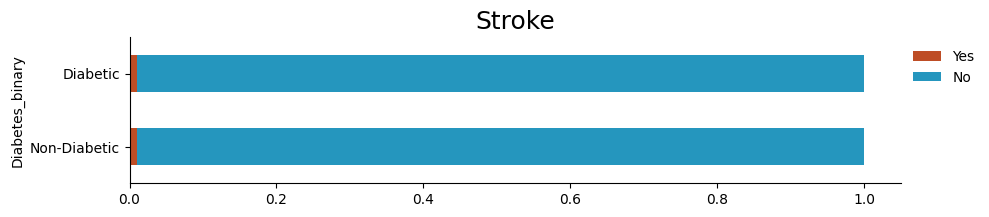

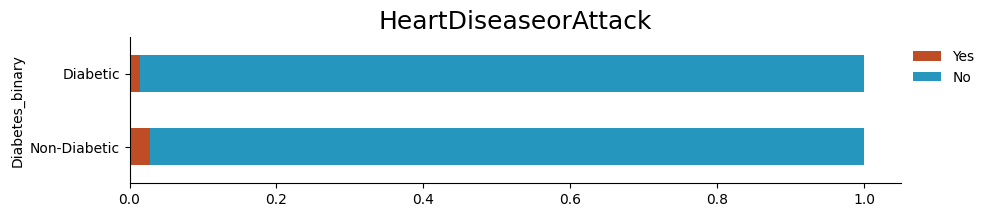

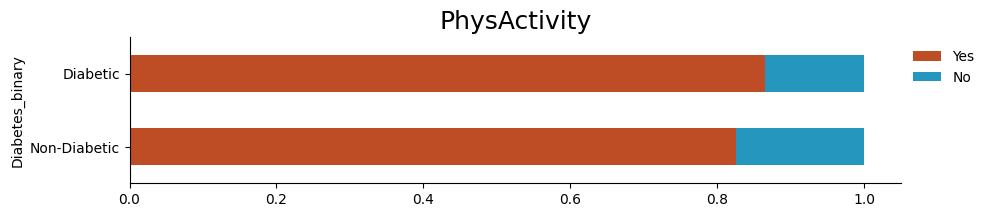

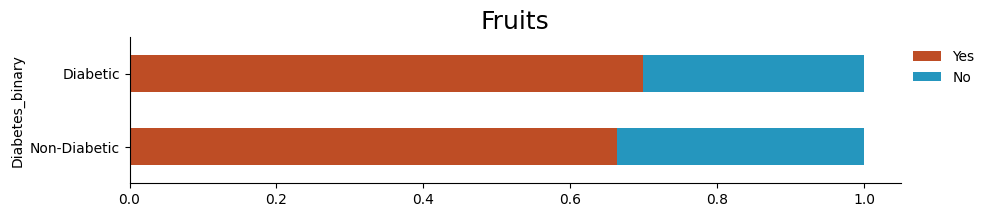

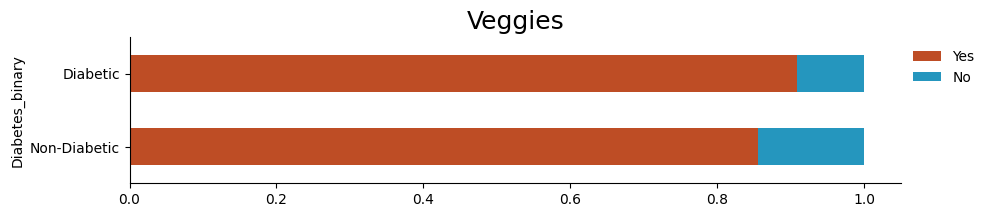

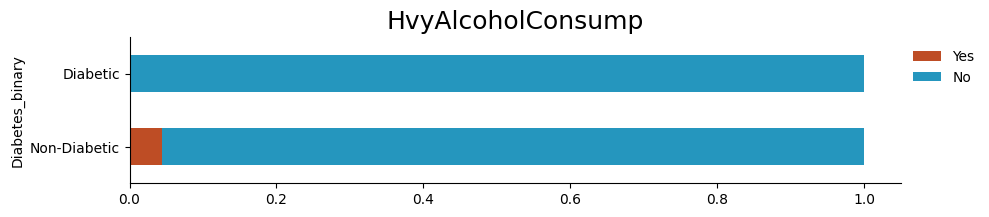

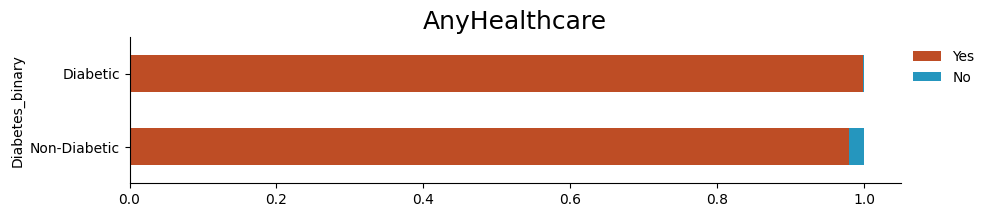

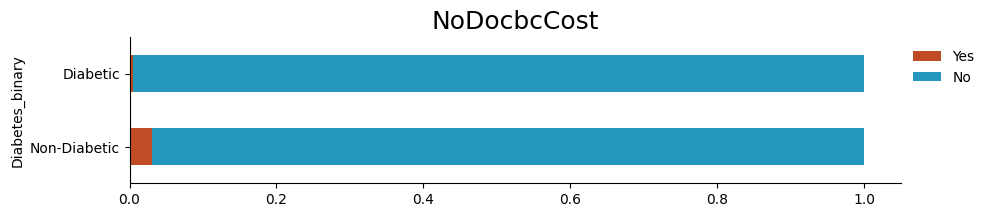

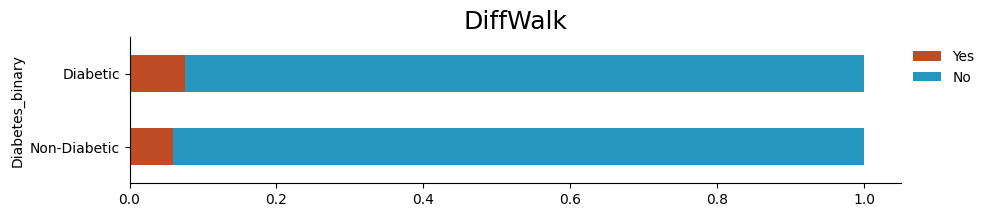

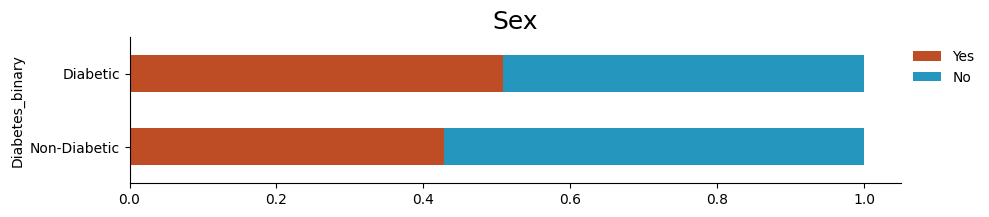

In [33]:
for var in bool_vars:
    analyse_cat(var)

- In variable Sex, yes = Male, No = Female

# EDA: Numeric non-binary Variables

In [34]:
df[num_vars].describe()

,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income
count,154448.000000,154448.000000,154448.000000,154448.000000,154448.000000,154448.000000,154448.000000
mean,27.812882,2.254196,1.549687,1.702476,7.925237,5.169759,6.453946
std,5.795939,0.841573,4.250303,4.560970,3.087038,0.873821,1.733320
min,12.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,24.000000,2.000000,0.000000,0.000000,6.000000,4.000000,6.000000
50%,27.000000,2.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,31.000000,3.000000,1.000000,1.000000,10.000000,6.000000,8.000000
max,98.000000,5.000000,30.000000,30.000000,13.000000,6.000000,8.000000


- Preview of the numeric variables distribution 

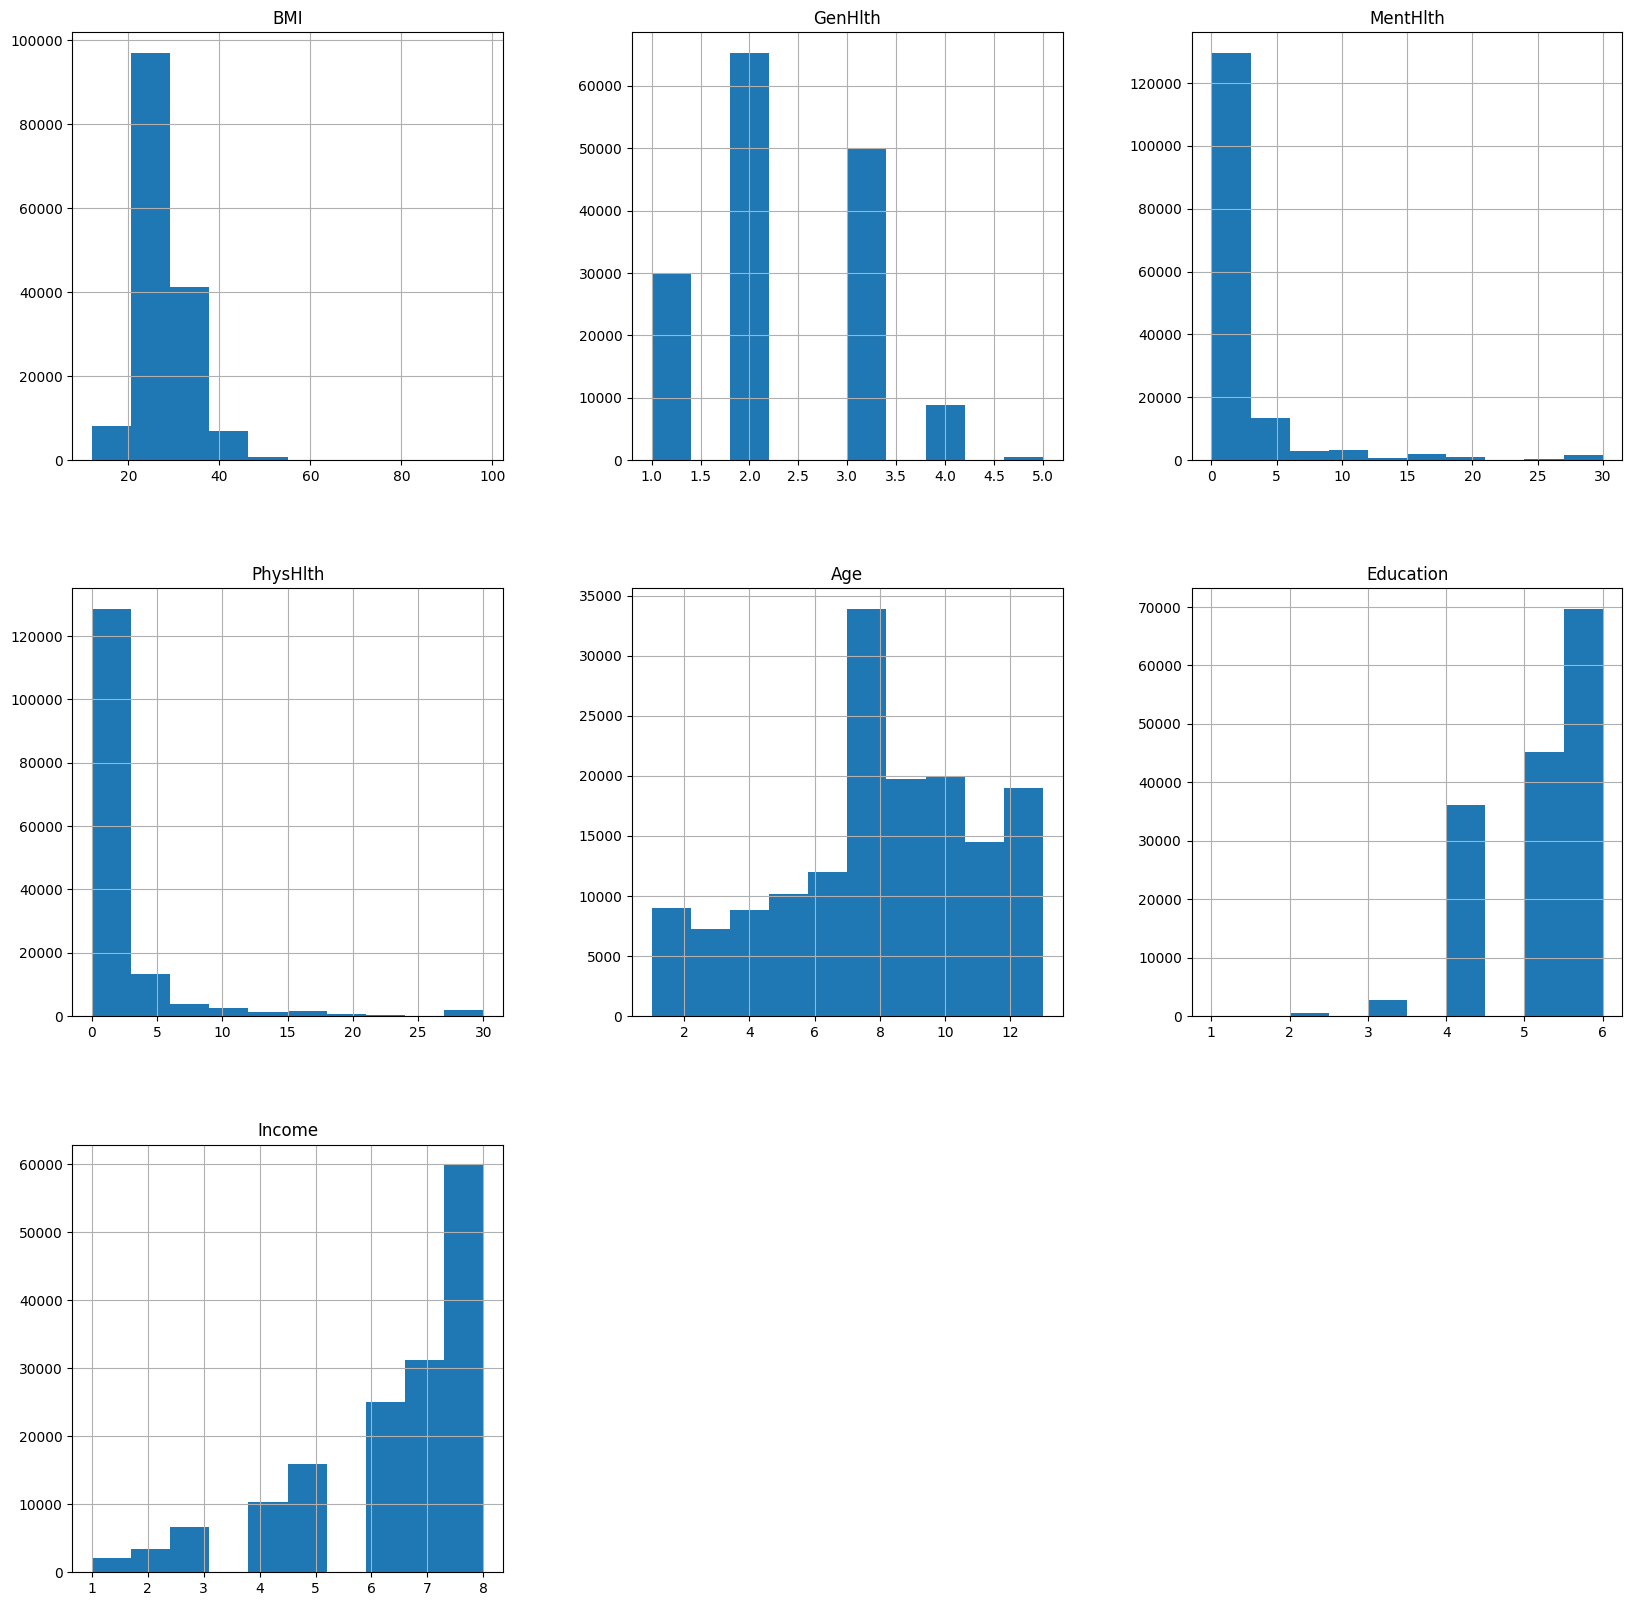

In [35]:
df[num_vars].hist(figsize=(20,20));

# Number of unique values

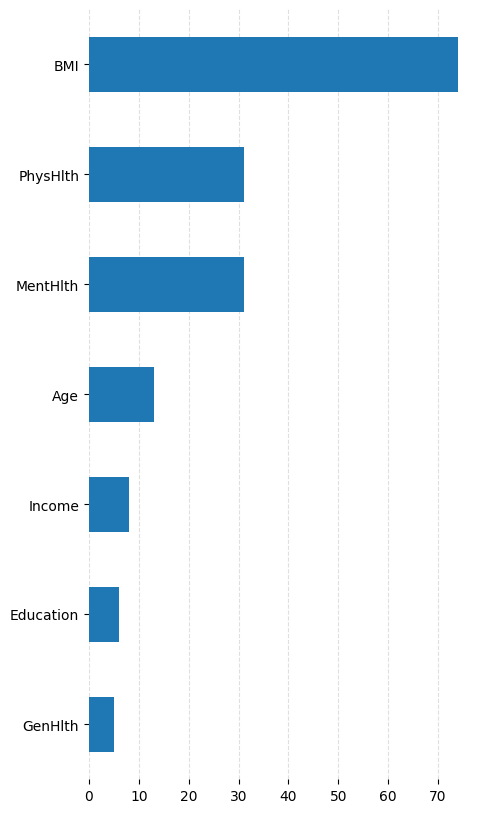

In [36]:
(df[num_vars]
 .nunique()
 .sort_values(ascending=True)
.plot(kind='barh', figsize=(5,10), zorder=3)).spines[['top','right', 'left', 'bottom']].set_visible(False)
plt.grid(axis='x', linestyle='--', alpha=.4)

BMI seems to be continuous values, PhysHlth and MentHlth are both at 30, can be a month related variable. Age, Income, Education and GenHlth seems to be hierarchical categories.

# Relationship between variables

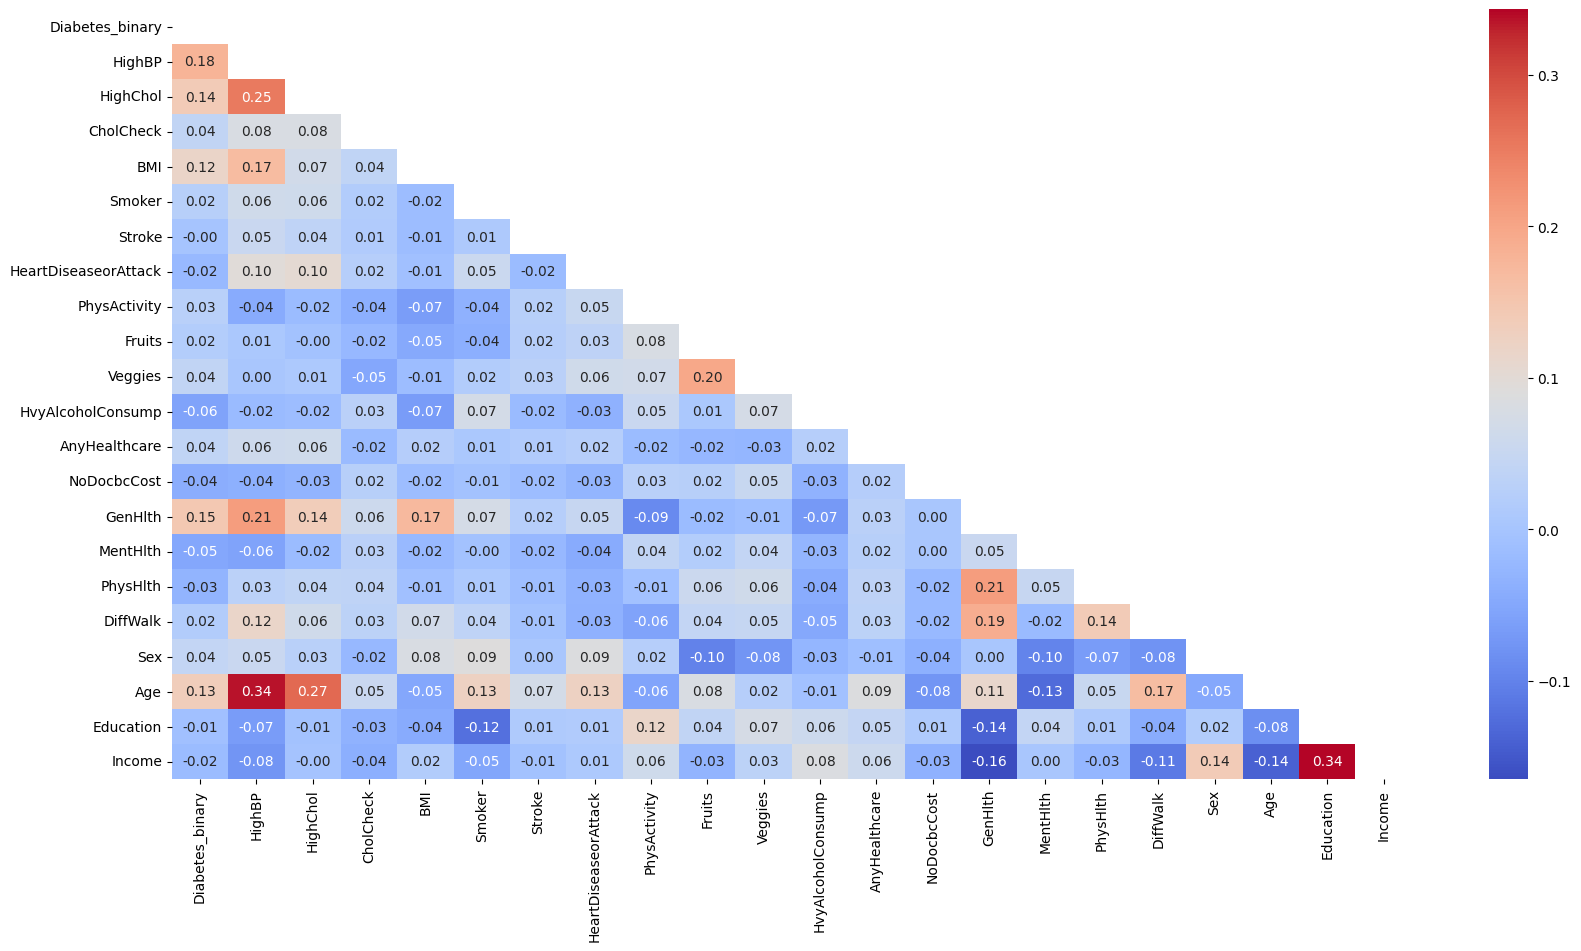

In [37]:
# Plot the heat map of dataset
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', mask=mask, fmt='.2f')
plt.show()

## Strong Correlations:

* The analysis revealed a significant positive correlation between the Physical Health and General Health variables, suggesting that General Health may be a composite measure comprising Physical Health Sum and other related factors.

* Furthermore, the analysis indicated a negative correlation between Income and General Health, implying that individuals with lower incomes may experience limited access to private medical care, potentially leading to negative impacts on their overall health outcomes.

# Correlations with Target Variable

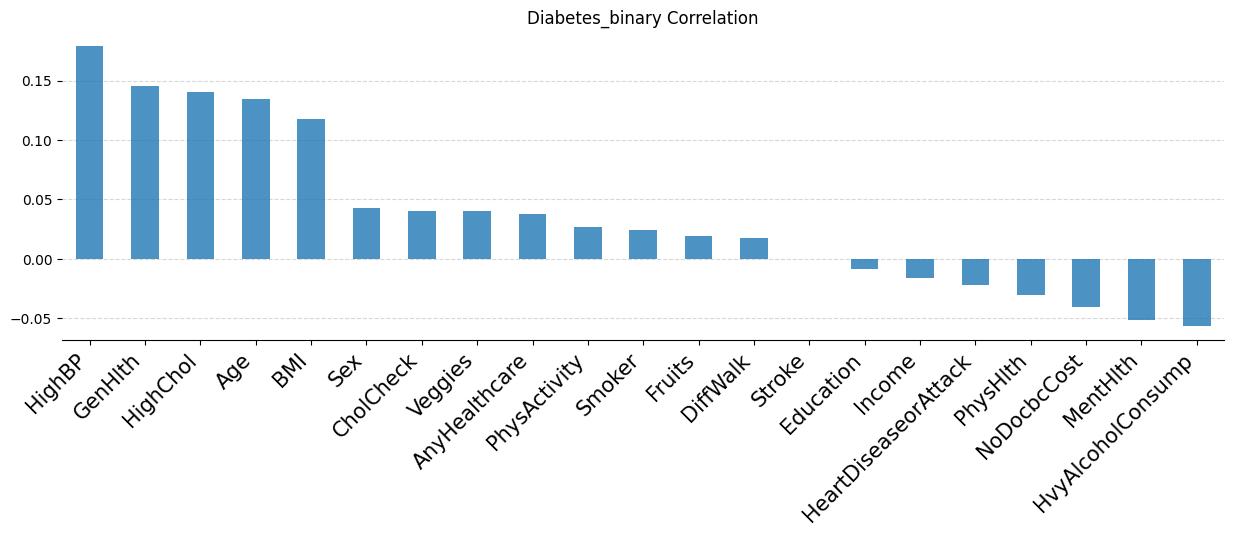

In [38]:
(df.drop('Diabetes_binary', axis=1)
   .corrwith(df.Diabetes_binary)
   .sort_values(ascending=False)
   .plot(kind='bar', figsize=(15, 4), title="Diabetes_binary Correlation", alpha=0.8, zorder=3)
   .spines[['top','right', 'left']].set_visible(False)
   )
plt.grid(axis='y', linestyle='--', alpha=.5)
plt.xticks(rotation = 45, ha='right', size=15);


This variables have more correlated with the target variable **Diabetes_binary**
* GenHlth
* HighBP
* DiffWalk
* BMI
* HighChol
* Age
* HeartDiseaseorAttack
* PhysHlth
* Physactivity
* Education
* Income

This variables that have a very weak correlation
* AnyHealthcare
* NoDocbcCost
* Fruits
* Sex
* Smoker
* Veggies


# Feature selection

In [39]:
# list of columns sorted by Pearson correlation
pear_coor = (df.drop('Diabetes_binary', axis=1)
   .corrwith(df.Diabetes_binary)
   .abs()
   .sort_values(ascending=False))
pear_coor

HighBP                  0.179128
GenHlth                 0.145727
HighChol                0.140739
Age                     0.134705
BMI                     0.117390
HvyAlcoholConsump       0.056524
MentHlth                0.051540
Sex                     0.043121
NoDocbcCost             0.040696
CholCheck               0.040475
Veggies                 0.040335
AnyHealthcare           0.037798
PhysHlth                0.030539
PhysActivity            0.026825
Smoker                  0.023936
HeartDiseaseorAttack    0.021988
Fruits                  0.019382
DiffWalk                0.017621
Income                  0.016159
Education               0.008814
Stroke                  0.000311
dtype: float64

In [40]:
names = pear_coor[pear_coor>0.05]
print(names)

HighBP               0.179128
GenHlth              0.145727
HighChol             0.140739
Age                  0.134705
BMI                  0.117390
HvyAlcoholConsump    0.056524
MentHlth             0.051540
dtype: float64


Pearson correlation coefficients sorted in decreasing order and absolute value.

If we set a threshold of 0.05, **Sex, NoDocbcCost and AnyHealthcare** features are eliminated.

## Model Building

In [41]:
def classifiers_models_test(clf_names, clf_list):
    '''For a given list of classfier name_list and object_list,
     return model, ACC, AUC and RMSE Dataframe'''
    
    info_clf = []
    for count, clf in enumerate(clf_list):
        clf = GridSearchCV(clf_list[count], params[count], cv=5, verbose=2, n_jobs=-1)
        clf.fit(X_train, y_train)
        #train results
        y_pred = clf.predict(X_train)
        y_pred_proba = clf.predict_proba(X_train)[:,1]
        acc_score_xtr = accuracy_score(y_train, y_pred)
        auc_score_xtr = roc_auc_score(y_train,y_pred_proba)
        rmse_xtr = np.sqrt(mean_squared_error(y_train, y_pred))
        #test results
        y_pred = clf.predict(X_test)
        y_pred_proba = clf.predict_proba(X_test)[:,1]
        acc_score_xts = accuracy_score(y_test, y_pred)
        auc_score_xts = roc_auc_score(y_test,y_pred_proba)
        rmse_xts = np.sqrt(mean_squared_error(y_test, y_pred))
        
        info_clf.append([clf_names[count],acc_score_xtr,auc_score_xtr,rmse_xtr,acc_score_xts,auc_score_xts,rmse_xts])
        info_df = pd.DataFrame(info_clf, columns=['Model', 
                                'train_Accuracy','train_AUC', 'train_RMSE', 
                                'test_Accuracy','test_AUC', 'test_RMSE'])
    return info_df

In [42]:
# list of models
KNN = KNeighborsClassifier()
gauss_nb = GaussianNB()
lr = LogisticRegression(max_iter=1000)
lda = LinearDiscriminantAnalysis()
dc = DecisionTreeClassifier()
gb = GradientBoostingClassifier()
rdf = RandomForestClassifier()
xgb = XGBClassifier()

In [43]:
knn_param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree']}
nb_param_grid = {'var_smoothing': [1e-09]}
lr_param_grid = {'C': [0.01, 0.1, 1], 'penalty': ['l1', 'l2'], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
lda_param_grid = {}
dc_param_grid = {'max_depth': [3, 5, 7], 'criterion':['gini','entropy'],'min_samples_split': [2, 3, 4], 'min_samples_leaf': [1, 2, 3]}
gb_param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1], 'max_depth': [3, 5, 7]}
rf_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7], 'min_samples_split': [2, 3, 4]}
xgb_param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1], 'max_depth': [3, 5, 7],'eval_metric':['error']}

In [46]:
X = df[names.index]
y = df['Diabetes_binary']
scaler = StandardScaler()

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf_names = ['LogisticRegression','LDA', 'KNeighbors', 'GaussianNB','GradientBoosting','DecisionTree','RandomForest', 'XgBoost']
clf_list = [lr, lda, KNN, gauss_nb, gb, dc, rdf, xgb]
params = [lr_param_grid,lda_param_grid,knn_param_grid,nb_param_grid,gb_param_grid,dc_param_grid,rf_param_grid,xgb_param_grid]
perf = classifiers_models_test(clf_names,clf_list)
print(perf)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
                Model  train_Accuracy  train_AUC  train_RMSE  test_Accuracy  \
0  LogisticRegression        0.923994   0.780181    0.275691       0.924895   
1                 LDA        0.923807   0.777295    0.276030       0.924442   
2          KNeighbors        0.920987   0.757267    0.281092       0.918744   
3          GaussianNB        0.749351   0.777277    0.500649       0.746973   
4    GradientBoosting        0.924527   0.764561    0.274724       0.925607   
5        DecisionTree        0.924527

We got best test accuracy of '92.56' with Gradient boosting, Decision Tree, Random Forest and XGBoost after tuning the hyper parameters.